# 3.Simple Classification

In [60]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

### Choose the necessary def from the mp1.py

In [61]:
def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i, end=' ')
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    return [X_test, Y_test]

### Generate a training set of images of simple geometric shapes

In [62]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 

In [63]:
y_train = to_categorical(Y_train)

### Start to build the model

In [64]:
n_cols = X_train.shape[1]
model = Sequential()
model.add(Dense(3, activation='softmax', input_shape = (n_cols,)))

### Using the Adam optimizer

In [65]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
model.fit(X_train, y_train, nb_epoch=30, batch_size=32)

Epoch 1/30
300/300 [==============================] - 0s 1ms/step - loss: 1.6633 - acc: 0.4500
Epoch 2/30
300/300 [==============================] - 0s 191us/step - loss: 1.1086 - acc: 0.5733
Epoch 3/30
300/300 [==============================] - 0s 183us/step - loss: 0.6278 - acc: 0.7000
Epoch 4/30
300/300 [==============================] - 0s 190us/step - loss: 0.4502 - acc: 0.8300
Epoch 5/30
300/300 [==============================] - 0s 186us/step - loss: 0.5284 - acc: 0.7533
Epoch 6/30
300/300 [==============================] - 0s 176us/step - loss: 0.4289 - acc: 0.8200
Epoch 7/30
300/300 [==============================] - 0s 184us/step - loss: 0.2820 - acc: 0.9000
Epoch 8/30
300/300 [==============================] - 0s 180us/step - loss: 0.2088 - acc: 0.9467
Epoch 9/30
300/300 [==============================] - 0s 189us/step - loss: 0.1938 - acc: 0.9533
Epoch 10/30
300/300 [==============================] - 0s 195us/step - loss: 0.1813 - acc: 0.9600
Epoch 11/30
300/300 [==========

### check my classifier

In [67]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

In [68]:
[X_test, v] = generate_a_triangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 0., 1.]], dtype=float32)

In [69]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[1., 0., 0.]], dtype=float32)

# 4.Visualization of the Solution

### Getting weights

In [70]:
[W1, W2] = model.get_weights()
w10 = W1[:,0]
w11 = W1[:,1]
w12 = W1[:,2]

### Visualization

#### Rectangle

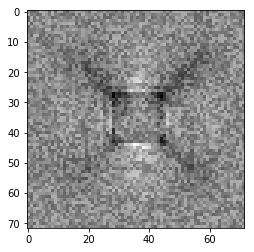

In [71]:
plt.imshow(w10.reshape(72,72), cmap='gray')

#### Disk

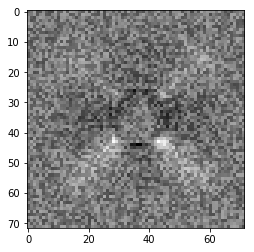

In [74]:
plt.imshow(w11.reshape(72,72), cmap='gray')

#### Triangle

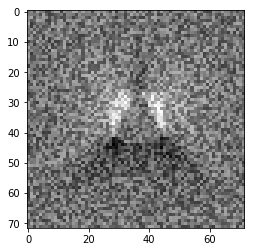

In [73]:
plt.imshow(w12.reshape(72,72), cmap='gray')

#### The results of Adam optimizer is much better and clear.